<div align="center">

# MEGR7172/8172

### Computational Methods (Fall 2025)
### Duke 227, Tu/Th 08:30 - 09:45 pm

</div>

# 5. Derivatives
The opposite of a numerical integral is a numerical derivative.
It is less often mentioned as it is much more straightforward to calculate.

The standard definition of a derivative is
$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$

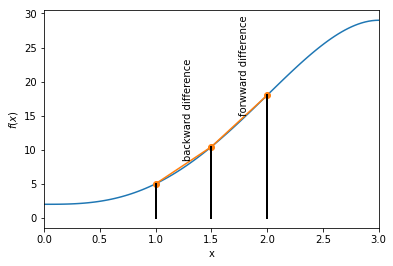

In [ ]:
# Let's start with a simple example, try to do integration on x^2 over [0,3]
import matplotlib.pyplot as plt
import numpy as np

#define the function
f = lambda x: -x**4 + 4*x**3 + 2

#define the parameters
x_min, x_max = 0, 3
npoints = 100
x0 = (x_min+x_max)/2
deltax = 0.5

#draw the plot
x = np.linspace(x_min, x_max, npoints)
plt.plot(x,f(x))

#draw the derivative
x_1 = np.array([x0-deltax, x0, x0+deltax])
plt.plot(x_1,f(x_1),'-o')
for point in x_1:
    linex, liney = [point, point], [0, f(point)]
    plt.plot(linex, liney, color='black', linewidth=2.0)

plt.text(x_1[0]+deltax/2, f(x_1[0]+deltax/2)+1, r'backward difference', {'ha': 'left', 'va': 'bottom'}, rotation=90)
plt.text(x_1[1]+deltax/2, f(x_1[1]+deltax/2)+1, r'forwward difference', {'ha': 'left', 'va': 'bottom'}, rotation=90)


plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([0,3])
plt.show()

## 5.1 Forward, backward and central differences
The forward and backward differences typically give about the same answer and in many cases you can use either.
Most often one uses the forward difference.

$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$

$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x)-f(x-h)}{h}$$

$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h/2)-f(x-h/2)}{h}$$


When there is a discontinuity in the derivative of the function at the point $x$, you need to be careful.

### Quiz: Write a small program to calculate the backward and forward diffrence



In [ ]:
#a small program to calculate the backward and forward diffrence


## 5.2 Second derivatives
We can also derive numerical approximations for the second derivative of a
function $f(x)$. The second derivative is, by definition, the derivative of the
first derivative, so we can calculate it by applying our first-derivative formulas
twice. For example, starting with the central difference formula, we
can write expressions for the first derivative at $x + h/2$ and $x − h/2$ thus:

$$f'(x+h/2) \approx \frac{f(x+h)-f(x)}{h}$$
$$f'(x-h/2) \approx \frac{f(x)-f(x-h)}{h}$$


$$f"(x) \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$




In [ ]:
#a small program to calculate the 2nd derivatives


## 5.3 Derivative of noisy data
Suppose we have some measurements of a quantity that come from an experiment in the lab, for instance. The overall shape of the curve is clear from the figure, but there is some noise in the data, so the curve is not completely smooth.

Now suppose we want to calculate the first derivative of this curve. So we
write a program to calculate, say, the forward difference at each point and plot
the values we get. This is a common problem with numerical
derivatives—if there’s any noise in the curve you’re differentiating, then it can be greatly exaggerated by taking the derivative, perhaps to the point where the results are useless.

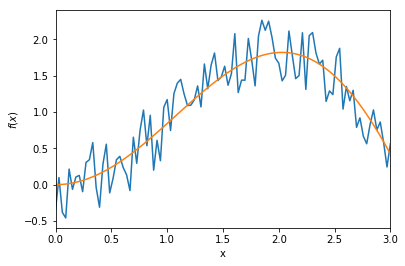

In [ ]:
#a small program to generate random noise

import matplotlib.pyplot as plt
import numpy as np

#define the function
f = lambda x: x * np.sin(x)

#define the paramters for the plot
a,b = 0,3
npoints = 100

x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5
plt.plot(x,y)
plt.plot(x,f(x))

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.show()


Unfortunately, this kind of issue is common, and this
is one of the reasons why numerical derivatives are used less than numerical
integrals. There are, however, some things we can do to mitigate the problem,
although they all also decrease the accuracy of our results.

- increase the value of h
- fit a curve to a portion of the data near the point where we want the derivative
- smooth the data in some other fashion before differentiating

## 5.4 Error Analysis

We can use Taylor series expansions to analyze the error in our numerical derivative approximations.

For the **forward difference**:
$$f(x+h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \frac{h^3}{3!} f'''(x) + O(h^4)$$
Rearranging to solve for $f'(x)$:
$$h f'(x) = f(x+h) - f(x) - \frac{h^2}{2!} f''(x) - \frac{h^3}{3!} f'''(x) - O(h^4)$$
$$f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2!} f''(x) - \frac{h^2}{3!} f'''(x) - O(h^3)$$
So the error in the forward difference is approximately $-\frac{h}{2} f''(x)$, which is of order $O(h)$.

For the **central difference**:
$$f(x+h/2) = f(x) + \frac{h}{2} f'(x) + \frac{(h/2)^2}{2!} f''(x) + \frac{(h/2)^3}{3!} f'''(x) + O(h^4)$$
$$f(x-h/2) = f(x) - \frac{h}{2} f'(x) + \frac{(h/2)^2}{2!} f''(x) - \frac{(h/2)^3}{3!} f'''(x) + O(h^4)$$
Subtracting the second equation from the first:
$$f(x+h/2) - f(x-h/2) = h f'(x) + 2 \frac{(h/2)^3}{3!} f'''(x) + O(h^5)$$
$$f(x+h/2) - f(x-h/2) = h f'(x) + \frac{h^3}{24} f'''(x) + O(h^5)$$
Rearranging to solve for $f'(x)$:
$$h f'(x) = f(x+h/2) - f(x-h/2) - \frac{h^3}{24} f'''(x) - O(h^5)$$
$$f'(x) = \frac{f(x+h/2) - f(x-h/2)}{h} - \frac{h^2}{24} f'''(x) - O(h^4)$$
So the error in the central difference is approximately $-\frac{h^2}{24} f'''(x)$, which is of order $O(h^2)$.

This shows that the central difference is generally more accurate than the forward (or backward) difference for a given step size $h$.

It is important to keep in mind that it is critical to understand the magnitude of error in a numerical simulation.